In [ ]:
# Problem 3: Chart Image Classification using CNN
import numpy as np
import os
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
dir_train_val = '/content/drive/MyDrive/charts/train_val'
dir_test = '/content/drive/MyDrive/charts/test'
path_label_train = '/content/drive/MyDrive/charts/train_val'
val_label_train = pd.read_csv('/content/drive/MyDrive/charts/train_val.csv')

In [ ]:
# Loading the training dataset in numpy array
images_List = []
labels_List = []

for filename in os.listdir(dir_train_val):
  if filename.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
    image = cv2.imread(os.path.join(dir_train_val, filename))
    image = cv2.resize(image, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_array = np.array(image)
    # Append the array to the list of images
    images_List.append(img_array)
    labels_List.append(filename)
 
# Converting string to numerical labels
lab = LabelEncoder()
labels_List = lab.fit_transform(labels_List)

In [ ]:
# Converting the lists to NumPy arrays
images_List = np.array(images_List)
labels_List = np.array(labels_List)

# Save the arrays in NumPy format
np.save('train_x.npy', images_List)
np.save('train_y.npy', labels_List)

train_x = np.load('train_x.npy') 
train_y = np.load('train_y.npy') 

In [ ]:
train_x.shape

(1000, 128, 128, 3)

In [ ]:
in_x[:5]
train_y[:5]

array([0, 5, 9, 7, 6])

In [ ]:
# loading the test dataset in numpy array
images_List = []
labels_List = []

for filename in os.listdir(dir_test):
  if filename.endswith('.png'):
    # Loading and resizing the images 
    image = cv2.imread(os.path.join(dir_test, filename))
    image = cv2.resize(image, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_array = np.array(image)
    # Append the array to the list of images
    images_List.append(image_array)
    labels_List.append(filename)

# Convert the string labels to numerical labels
lab = LabelEncoder()
labels_List = lab.fit_transform(labels_List)
 


In [ ]:
# Convert the lists to NumPy arrays
images_List = np.array(images_List)
labels_List = np.array(labels_List)

# Saving arrays in NumPy format
np.save('test_x.npy', images_List)
np.save('test_y.npy', labels_List)

test_x = np.load('test_x.npy') 
test_y = np.load('test_y.npy')

In [ ]:
test_x.shape

(50, 128, 128, 3)

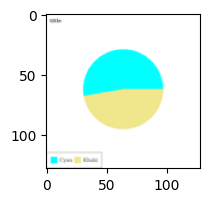

In [ ]:
# Plot the figure
plt.figure(figsize = (10,2))
plt.imshow(train_x[10])
plt.imshow(train_x[208])
plt.imshow(train_x[444])

In [ ]:
# Defining classes 
class_image = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
class_image[0]

# Mapping the categories to the labels array i.e train_y
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
train_y = np.array([label_map[label] for label in val_label_train['type']])
train_y
train_y.shape
test_y.shape


(50,)

In [ ]:
# Mapping labels from csv to images
# Function for testing the chart 
def chart_sample(x, y, index):
  plt.figure(figsize = (10,2))
  plt.imshow(x[index])
  plt.xlabel(class_image[y[index]])


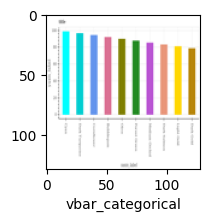

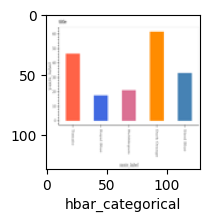

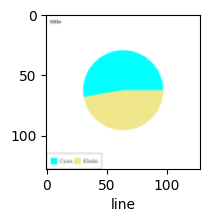

In [ ]:
chart_sample(train_x,train_y,0)
chart_sample(train_x,train_y,208)
chart_sample(train_x,train_y,444)

In [ ]:
#Normalizing the image
train_x = train_x/255
test_x = train_x/255
test_x.shape

(1000, 128, 128, 3)

In [ ]:
#Label for train data from csv file
train_y_index = val_label_train['image_index']
train_y_type = val_label_train['type']
train_y_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [ ]:
#Simple nn test
nn_model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])

# Compile the model
nn_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn_model.fit(train_x,train_y,epochs=10)

Epoch 1/10
32/32 [==============================] - 36s 1s/step - loss: 7.7136 - accuracy: 0.2210
Epoch 2/10
32/32 [==============================] - 54s 2s/step - loss: 1.6200 - accuracy: 0.2060
Epoch 3/10
32/32 [==============================] - 45s 1s/step - loss: 1.6221 - accuracy: 0.2070
Epoch 4/10
32/32 [==============================] - 52s 2s/step - loss: 1.6070 - accuracy: 0.2180
Epoch 5/10
32/32 [==============================] - 60s 2s/step - loss: 1.6308 - accuracy: 0.1940
Epoch 6/10
32/32 [==============================] - 57s 2s/step - loss: 1.6292 - accuracy: 0.2020
Epoch 7/10
32/32 [==============================] - 53s 2s/step - loss: 1.6104 - accuracy: 0.2020
Epoch 8/10
32/32 [==============================] - 53s 2s/step - loss: 1.6564 - accuracy: 0.1970
Epoch 9/10
32/32 [==============================] - 44s 1s/step - loss: 1.6147 - accuracy: 0.2000
Epoch 10/10
32/32 [==============================] - 41s 1s/step - loss: 1.6094 - accuracy: 0.2070


In [ ]:
# Spliting the training images & labels into training & validation sets

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
nn_model.evaluate(test_x,test_y)

5/5 [==============================] - 2s 357ms/step - loss: 1.6059 - accuracy: 0.2500


[1.6059280633926392, 0.25]

In [ ]:
y_pred = nn_model.predict(test_x)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]

5/5 [==============================] - 2s 298ms/step


In [ ]:
# Printing & verifying the shapes of the arrays
print("Train Images Shape:", train_x.shape)
print("Train Labels Shape:", train_y.shape)
print("Test Images Shape:", test_x.shape)
print("Test Labels Shape:", test_y.shape)


Train Images Shape: (640, 128, 128, 3)
Train Labels Shape: (640,)
Test Images Shape: (160, 128, 128, 3)
Test Labels Shape: (160,)


Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 1.6126 - accuracy: 0.1937 - val_loss: 1.8298 - val_accuracy: 0.3000
Epoch 2/50
1/1 [==============================] - 12s 12s/step - loss: 1.7295 - accuracy: 0.3219 - val_loss: 1.6288 - val_accuracy: 0.2188
Epoch 3/50
1/1 [==============================] - 12s 12s/step - loss: 1.5838 - accuracy: 0.2984 - val_loss: 1.5398 - val_accuracy: 0.3000
Epoch 4/50
1/1 [==============================] - 10s 10s/step - loss: 1.5385 - accuracy: 0.3063 - val_loss: 1.5060 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 12s 12s/step - loss: 1.5032 - accuracy: 0.4406 - val_loss: 1.4795 - val_accuracy: 0.3812
Epoch 6/50
1/1 [==============================] - 12s 12s/step - loss: 1.4639 - accuracy: 0.3797 - val_loss: 1.4182 - val_accuracy: 0.4062
Epoch 7/50
1/1 [==============================] - 12s 12s/step - loss: 1.3910 - accuracy: 0.4609 - val_loss: 1.3774 - val_accuracy: 0.4563
Epoch 8/50
1/1 [===========

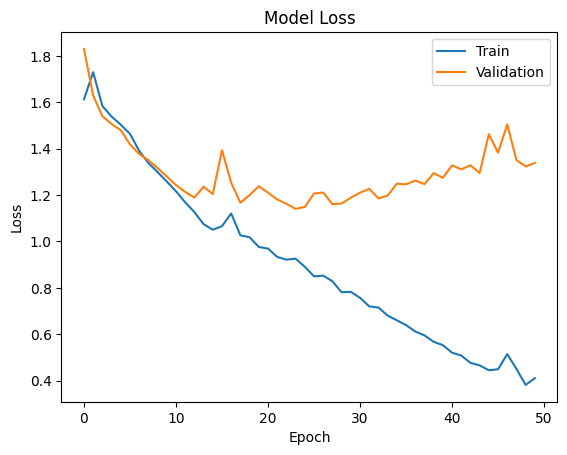

In [ ]:
# Modifying the model architecture to CMNN
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(train_x, train_y, batch_size=1000, epochs=50,validation_data=(test_x, test_y))

# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
cnn_model.evaluate(test_x,test_y)

5/5 [==============================] - 1s 218ms/step - loss: 1.3384 - accuracy: 0.5688


[1.3384183645248413, 0.5687500238418579]

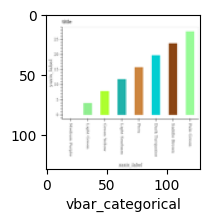

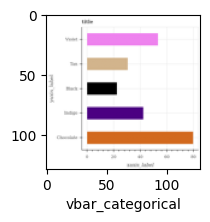

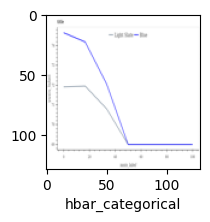

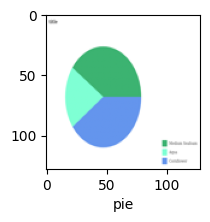

In [ ]:
chart_sample(test_x,test_y,1)
chart_sample(test_x,test_y,50)
chart_sample(test_x,test_y,25)
chart_sample(test_x,test_y,30)

In [ ]:
y_pred = cnn_model.predict(test_x)
y_pred[:5]

5/5 [==============================] - 1s 117ms/step


array([[3.5971828e-02, 3.2747898e-02, 1.5623438e-04, 8.0021108e-03,
        9.2312187e-01],
       [6.4213961e-02, 1.0647608e-03, 8.2667042e-03, 7.8795433e-01,
        1.3850029e-01],
       [1.5873263e-02, 3.4778166e-04, 4.9572308e-03, 9.4698793e-01,
        3.1833734e-02],
       [3.3958653e-01, 9.9718114e-03, 2.0852375e-03, 2.5056306e-05,
        6.4833134e-01],
       [1.1852155e-01, 2.0391963e-04, 3.7869448e-03, 2.0712931e-03,
        8.7541628e-01]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[4, 3, 3, 4, 4]

In [ ]:
test_y[:5]

array([4, 3, 2, 4, 4])

'hbar_categorical'

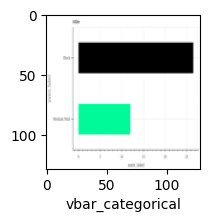

In [ ]:
chart_sample(test_x,test_y,15) #actual
class_image[y_classes[15]] #predicted

In [ ]:
print("classification report: \n", classification_report(test_y,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.57      0.78      0.66        40
           1       0.57      0.65      0.61        26
           2       0.50      0.35      0.42        31
           3       0.68      0.49      0.57        35
           4       0.52      0.54      0.53        28

    accuracy                           0.57       160
   macro avg       0.57      0.56      0.55       160
weighted avg       0.57      0.57      0.56       160



In [ ]:
# Generate the confusion matrix 
confusion_mat = confusion_matrix(test_y, y_classes)
print('Confusion Matrix:')
print(confusion_mat)

Confusion Matrix:
[[31  4  1  0  4]
 [ 2 17  1  1  5]
 [15  1 11  4  0]
 [ 1  3  9 17  5]
 [ 5  5  0  3 15]]


Text(95.72222222222221, 0.5, 'Actual')

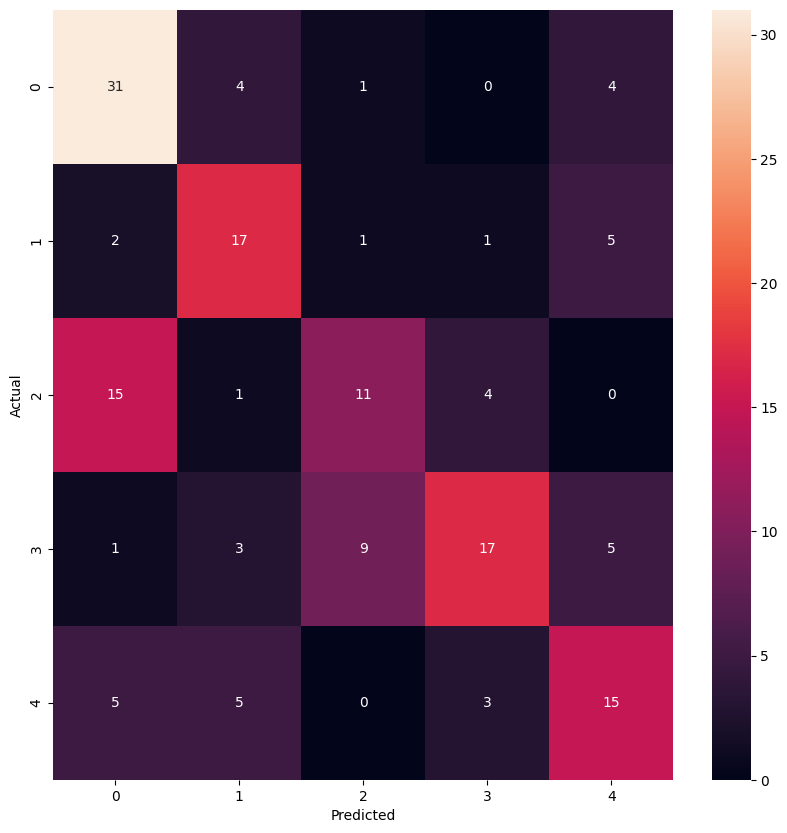

In [ ]:
# Plotting the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(confusion_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)


In [ ]:
# Freezing all the weights of layers except the new classification layer
for layer in pt_model.layers:
 layer.trainable = False

In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Printing model architecture summary 
pt_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(train_x, train_y, batch_size=32)
test_generator = train_datagen.flow(test_x, test_y, batch_size=32)

In [ ]:
# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

Epoch 1/100


ValueError: ignored